# Project Planning Stage (Individual)  
**Nicholas Liu** | **Group 33**

First, let's load the tidyverse and repr packages, and download the files to meet the requirement that the .ipynb file ***"must be fully reproducible. It must run completely from top to bottom without any additional files."***

In [1]:
library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
download.file("https://raw.githubusercontent.com/naldonymous/dsci-100-2025w1-group-33/refs/heads/main/players.csv", "players.csv")
download.file("https://raw.githubusercontent.com/naldonymous/dsci-100-2025w1-group-33/refs/heads/main/sessions.csv", "sessions.csv")

## Data Description

Now, let's read the files into variables, and then get a preview of the files, to see what they're about.

In [3]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
sessions <- read_csv("sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The dataset includes two files, `players.csv` and `sessions.csv`.

`players.csv` includes information about each player (user), like their experience, whether they are subscribed. This includes 7 variables:

|Variable|Type|Description
|-----------|-------|------------|
|experience|character|Categorical variable that shows the player's relative experience level|
|subscribe|logical|If the player is subscribed to a game-related newsletter|
|hashedEmail|character|Unique hashed email of user|
|playedHours|double|Hours player has played|
|name|character|First name of player|
|gender|character|Gender of player|
|Age|integer|Age of player (years)|

`sessions.csv` includes the hashed (but unique) email of users, with their start time in UTF format and normal format. This includes 5 variables.

|Variable|Type|Description
|-----------|-------|------------|
|hashedEmail|character|Unique hashed email of user|
|start_time|character|Date and time of when the session started|
|end_time|character|Date and time of when the session ended|
|original_start_time|double|Start time of the session in UNIX format (ms)|
|original_end_time|double|End time of the session in UNIX format (ms)|

Let's find the number of observations in each file.

In [10]:
obsPlayers <- summarize(players, count = n()) |> pull(count)
obsSessions <- summarize(sessions, count = n()) |> pull(count)
print(paste("Number of Observations in Players:", obsPlayers))
print(paste("Number of Observations in Sessions:", obsSessions))

[1] "Number of Observations in Players: 196"
[1] "Number of Observations in Sessions: 1535"


There are 196 observations in the players dataset, and 1535 observations in the sessions dataset. This difference makes sense, since players can have multiple sessions. Next up, we need to find the summary statistics (values reported to 2 decimal places).

In [5]:
summarizedPlayers <- summary(players)
summarizedPlayers

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [6]:
summarizedSessions <- summary(sessions)
summarizedSessions

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

Let's find the mean, to 2 decimal places, of the numerical variables. Since the summary function already kindly found the mean, median, and other summary statistics, we'll just use the data it gives, up to 2 decimal places, for the means:

For `players.csv`:
|Variable|Mean
|-------|-------|
|played_hours|5.85|
|Age|21.14|

For `sessions.csv`:
|Variable|Mean
|-------|-------|
|original_start_time|1.72e+12|
|original_end_time|1.72e+12|

(perhaps not the most helpful statistic)

## Questions:

I will address the **broad question of interest** of:  
***What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?***

My specific question will be:
Can the variables of Age, gender, played_hours, and experience predict whether a player is subscribed to a game-related newsletter in `players.csv`?

## Exploratory Data Analsyis and Visualization

In [6]:
playersQuantitative <- select(players, played_hours, Age)
playersQuantitativeMean <- map_dfr(playersQuantitative, mean, na.rm = TRUE)
playersQuantitativeMean

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


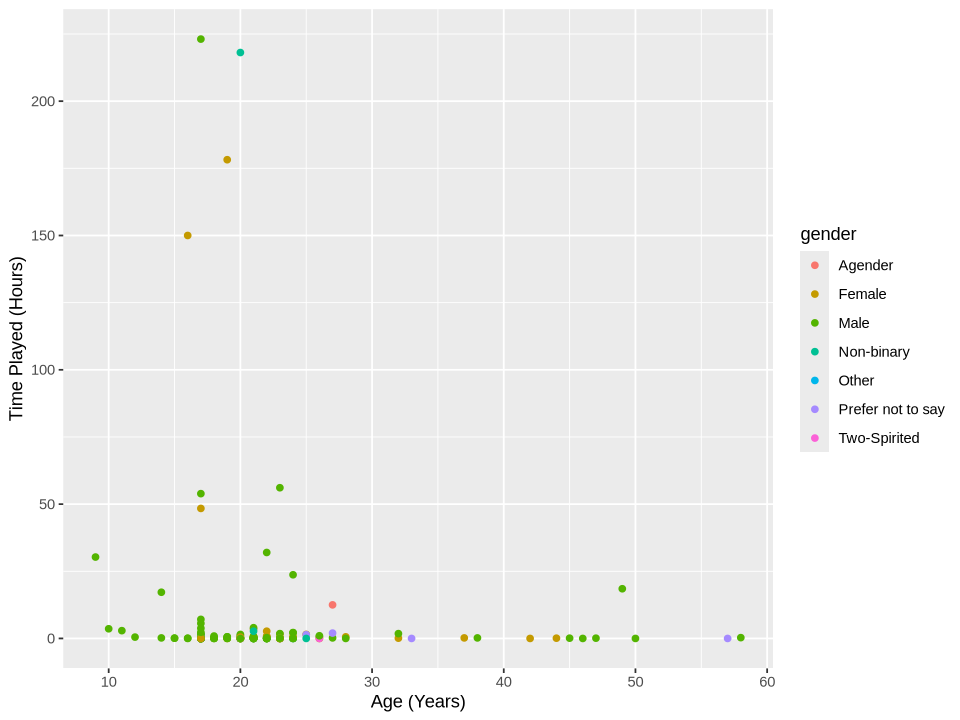

In [7]:
options(repr.plot.width = 8, repr.plot.height = 6)
playersPlot <- ggplot(players, aes(x = Age, y = played_hours, colour = gender)) +
    geom_point() +
    labs(x = "Age (Years)", y = "Time Played (Hours)")
playersPlot

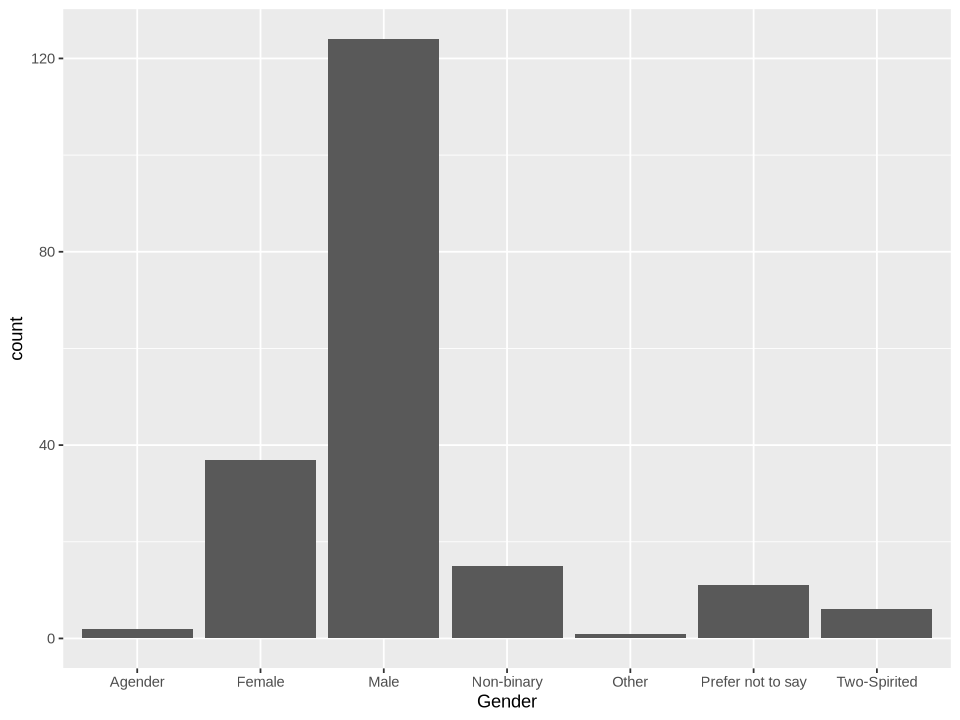

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
playersBarPlot <- ggplot(players, aes(x = gender)) +
    geom_bar() +
    labs(x = "Gender")
playersBarPlot

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


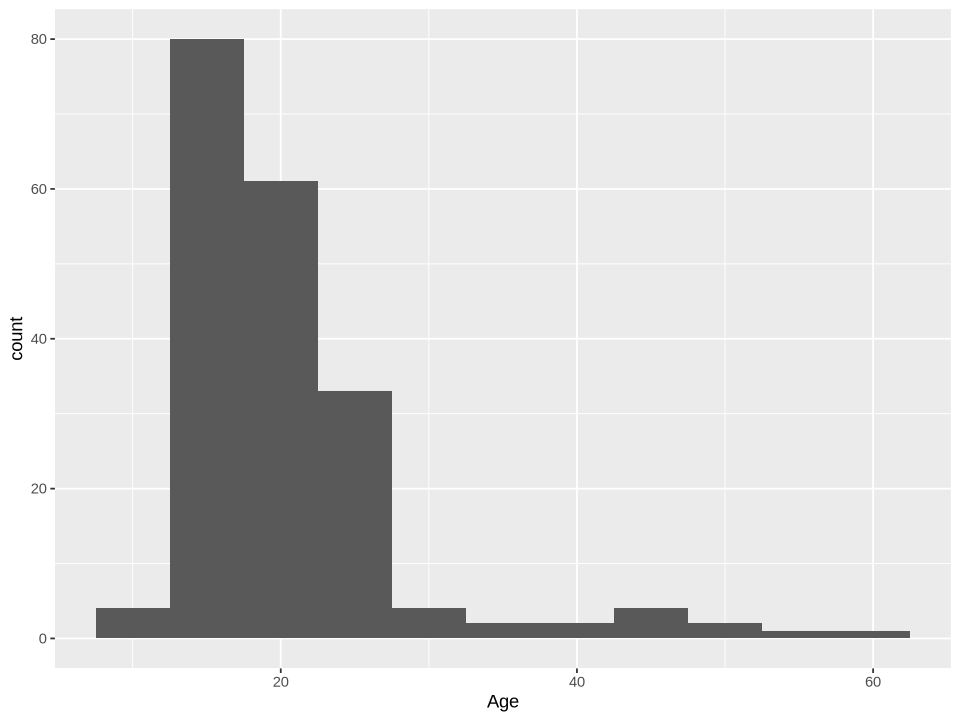

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
playersHistoPlot <- ggplot(players, aes(x = Age)) +
    geom_histogram(binwidth = 5) +
    labs(x = "Age")
playersHistoPlot

## Methods and Plan

We will use knn classification.

- Why is this method appropriate?

We are trying to predict if they are subscribed, and see which characteristics are the best predictors. Subscribed is not quantitative, so classification works best.

- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?


## GitHub Repository  
https://github.com/naldonymous/dsci-100-2025w1-group-33.git